# Collision Induced Absorption

## What is it and how do we model it?

In Radiative Transfer there are three types of processes that influence the behavior of radiation: Absorption, Emission, and Scattering. 

Emission is rather unimportant at the temperature scales we work with on Titan: its so cold there that emission is far away from the wavelengths we carry about (roughly 29 microns, it seems, when the furthest we go out is 5) and due to the laws of blackbody radiation, is an extremely small amount of energy. (All blackbody radiation levels are higher at higher temperature, so low temperatures are lower across the board compared to high ones.) So Emission is moot. 

Absorption is highly important, and in fact has the same mechanism as Emission: there are specific energy levels in particles, and jumps between these particles either require (absorb) energy or release (emit) energy to occur, mostly via electron shells but there are vibraitonal and other modes that can be used as well. 

Scattering can be thought of as the "non-quantum" effects matter has on light. At non-quantum regimes, light acts as a wave that flows around and is diverted through various objects; for the most part scattering simply redirects incoming light. 

Now, in Titan's atmosphere, our model considers several different types of things:

### Aerosol/Haze Absorption/Scattering

Many larger particles are often suspended in the atmosphere. These larger suspended particles both scatter and absorb a wide variety of wavelengths. We don't have the capacity to build up the exact nature of the aerosols from theory, but we can use our observations to determine what their contribution is, and thus adapt it into the fold. We model the haze with relative densities, single scattering albedos, and the like: revealing that what we consider the Haze contribution is actually both absorption and scattering taking place at once. This does not fit into any of the above categories and is just a catch-all for a situation with many compositional unknowns. 

### Gas Absorption

The gaseous particles in the atmosphere all have their own absorption spectra. In Titan, Methane is the primary abosrber, but there's also carbon monoxide, hydrogen cyanide, and other things, each of which absorb specific wavelengths and add together to form a total absorption spectra. This absorption primarily has to deal with quantized energy levels, and certain excited states being allowed/dissalowed for specific photon energies. One may think this would include all absorption caused by known particles (with the haze being the unknown) but that is not true, as we will see later. 

### Rayleigh Scattering

This is not currently in the model but it is looking like it will be added. Any particles that are significantly smaller than incoming wavelengths will exhibit Rayleigh Scattering, where higher frequencies are scattered preferentially. Nitrogen, the dominant gas on Titan, does this, and it does it on Earth as well, making the sky blue. As we are in the infrared the effect is not particuarly strong, as we are long wavelengths, but it is present at the "blue" end. 

Of note, there are other types of scattering. Compton Scattering deals only with very high energy wavelengths, which we don't have, and Mie Scattering deals with particles that are similar in size to the considered wavelengths, which are things like water droplets on Earth. Does Titan have need for "comparably sized" particles? Perhaps, but we don't know the composition of the haze so it's put in that section. (A question: what of the clouds? They usually aren't modeled in global pictures, so they are presumably irrelevant to our purposes, but would it be important?)

### Collision Induced Absorption

Which leads us to CIA, Collision Induced Absorption. Which I don't know enough about! So let's figure it out!

[3] gives us our base summary. When otherwise transparent gasses become dense enough, they start to collide more often, and when they collide the overall shape of the atoms/molecules changes due to the intermolecular forces--remember, Van Der Waals forces occur because the nucleus is attracted to the electron cloud while the elctron cloud is repulsed, so two atoms coming in close contact will no longer be perfectly spherical, but instead "shifted." This creates an induced dipole. Now these dipoles (or more complicated setups) will interact with electromagnetic radiation fields, a.k.a., light photons. 

It's like, for a moment, you have a molecule made out of two parts instead of just one. (You can also have more, three-component interactions also produce an effect [4].) 

So in short, collisions temporarily rearrange the electromagnetic field of atoms/molecules. This altered field now has new ways to absorb and interact with incoming radiation. However, this effect only becomes noticable when the density of gas is high, which means there are more continuous collisions. In a collision free environment Collision Induced Absorption will simply not occur, as it requires molecule/atom interaction. 

It is these absorptions produced by collisions in sufficiently dense gas (which from [2] we know it is sufficiently dense given its effect on absorption) that we wish to model. However, I can already see an issue: how do you model the allowed absorptions when the molecules could strike each other in all sorts of configurations? We're working with N2 here, not He. One supposes we will have to start from the simpler case though, He, a nice inert gas that is spherically symmetrical, maybe Hydrogen too. 

Fortunately for us, I highly doubt we will have to be the ones drawing up these lines from theory, for our purposes we only need to be able to find the absorption and apply it to our model, so a simple measurement will suffice--maybe. 

[3] tells us that a first principles calculation involves an advanced quantum mechanical model. However, we don't need it from first principles, we could theoretically do it from emperical data. Which is probably what we need to adapt from [1], which is ultimatley our main purpose. How can we get the data? 

Well, there's the experimental data, which they say is from:

Baranov et al. 2005

McKellar 1988

Shapiro and Gush, 1966 (! Located!)

McKellar 1989

[2] also has an additional one for CIA, 

Lafferty et al. 1996

While also using McKellar 1989.

However I can't access many of these papers. Presumably the data exists, yes, but whether its extracable or not...

But we do know what the transmission shapes look like for very low temperatures. [1] has the following:

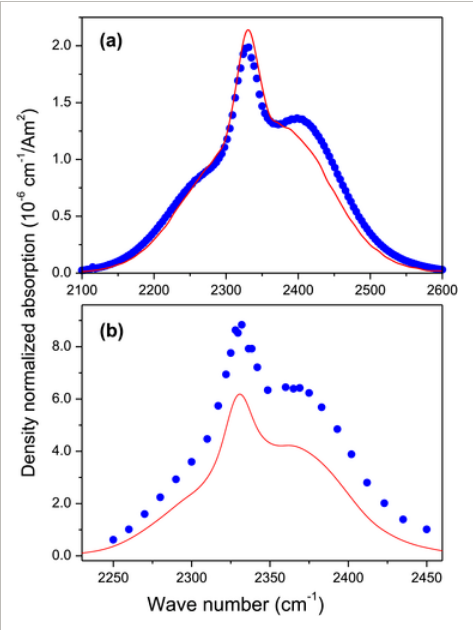

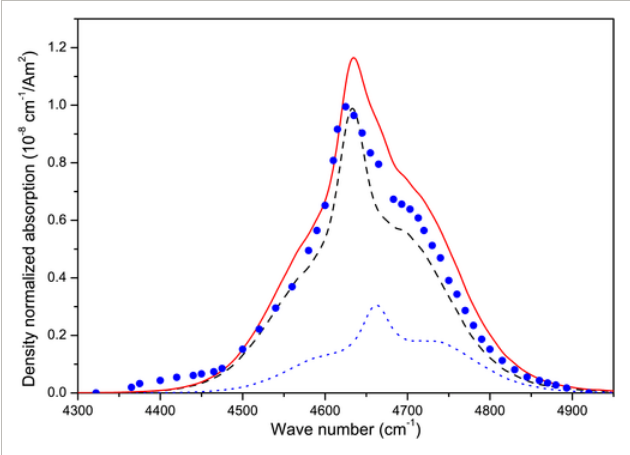

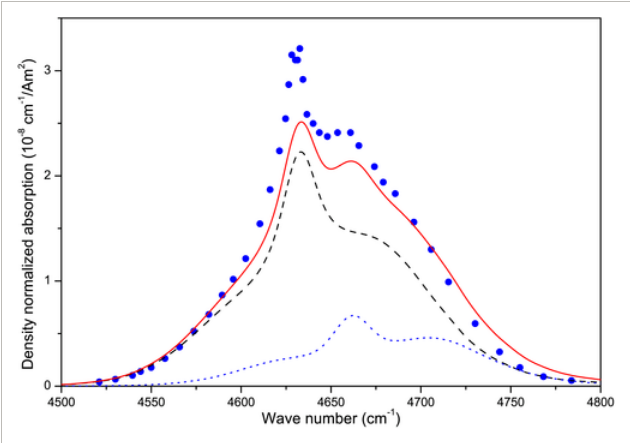

Note that no matter what these spectra are *smooth continua*, not a massive mess of spikes and needles like in normal gas absorption. So if we *have* the points, the integrator won't have a problem shuffling through them quickly, even without sorting by k-coefficients. As we'll recall from the correlated-k method, the issue was that spectra generally looked like this:

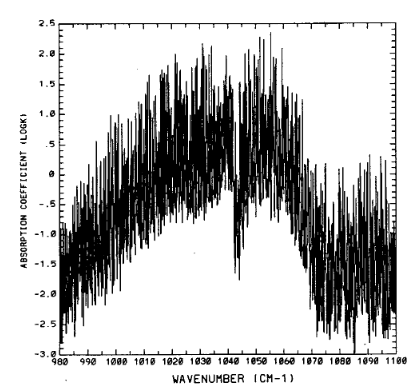

Porcupine pain. CIA spectra are not porcupine pain. Everything should be heavily broadened due to the nature of collisions [6], though the papers don't describe the exact mechanism as for why this is the case far as I know. 

So some questions:

1) can we generate these ourselves?

2) This is N2-N2 collisions, what of CH4-CH4 and CH4-N2? .

3) [2] seems to think N2-H2 is important as well. Why? 

4) How is this dependant upon pressure?
 
"The theoretical approaches can be found in" oh look at all these papers I can't access. Frommhold 2006, Hartmann et al, 2008.*



Quesiton 4 seems to be the most relevant to our purposes, actually. What is CIA's dependence on pressure / density? Obviously there's a point at which CIA is non-occuring due to being a non-collisional regime, and then there's a point at which it saturates and blocks everything. 

The simulations done above are at room and 77 K. We care mostly about 77 K. We can tell that the temperature difference does in fact change the bahavior. In both cases lower temperatures have significantly more absorption, and lower temperatures make the width wider as well. The shape of the absorption sees some change, but not too much. So at the very least so long as we don't drastically alter the temperature we'll be fine.

However, we do drastically alter the pressure, the question is does this change things? 

In [1] the CIA only depends on wavelength and temperature. We know this has to be crazy. [1] does mention that when doing modeling they only care about the bottom 10km of Earth's atmosphere where pressures are the highest and have a dominant contribution over minimal tempreature variations. Curiously this seems to coincide with Mt. Everest's peak, huh. In the same stentence a P-squared dependence of CIA is noted, though I'm not entirely sure where that comes from as the equation isn't stated. 

Actually, I found out exactly where it comes from! In the below section I was calculating collision rates, and eventually got:

$$ \propto \sigma n^2 \mu^{-1/2} $$

For constant temperature situations. Which is to say it depends on cross secitonal area, molecular mass, and the *number density*. From PV=NkT, if we ignore the constant contributions, we have $P \propto N/V = n$, thus the collision count goes up with $P^2$ and so CIA varies precisely with that.

([5] also says it, coulda saved me a lot of time...)

The question now is what pressure were the original experiments run at? 1 atm I'd guess. 

[6] states otherwise, having the absorptions tested at a few atmospheres to a few tens of atmospheres. We would think this would cause a problem, but then we realize what units the absorptions are reported in: $10^{-8} cm^{-1} / Am^2$.

Ams are Amagats, which is directly related to number density, which is a parameter directly tied to pressure as we just discussed, so the pressure information is contained in the measurement. The inverse centimeter is just a length scale, which makes sense as absorption is generally "Fraction absorbed per unit length". Thus since we have density normalized absorption, we have the pressure information encoded. 

In that case, we can apply to any pressure, and any of the selected wavelengths, and we can assume minimal temperature variation in the regimes where it matters (the low atmosphere). 

## Rate of Collisions

### This was probably unecessary but I calculated it so I'm keeping it here

#### Okay fine it was needed to answer some of our questions whoops.

Most of my work was rendered entirely moot because wikipedia just has the equation I wanted the entire time. 

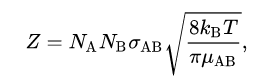

Note that the expression above has a typo. 

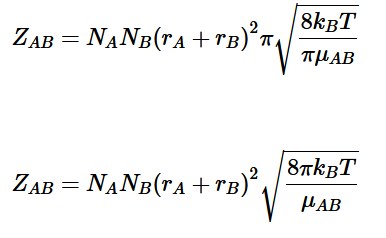

From https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Kinetics/06%3A_Modeling_Reaction_Kinetics/6.01%3A_Collision_Theory/6.1.04%3A_Collision_Frequency which is wikipedia's source, funnily enough. 

This is the collision frequency, collisions per volume per time. If we adjust this to the parameters we'd be using:

$$ Z = n_1n_2\sigma_{12} \sqrt{\frac{8\pi kT}{\frac{\mu_1\mu_2}{\mu_1+\mu_2}}}  $$

If gas constituent A is the same as gas constituent B, it becomes

$$ Z = n^2 \sigma \sqrt{\frac{16\pi kT}{ \mu}}  $$

This is annoyingly different from what I originally derived by a constant that I am no doubt going to spend forever hunting down... 

REGARDLESS the proportionality is the same, and that's all we care about. 

$$Z \propto n_1n_2\sigma_{12} \sqrt{\frac{\mu_1+\mu_2}{\mu_1\mu_2}} $$

Now, what are our values for these? We really just need estimates and relative relations. Nitrogen is 95% in titan's atmosphere, methane is 5%, rest is traces. 19 to 1. This will give us our n values. 

N2 has a molecular mass of 28, methane has 16, so roughtly a factor of 2 to 1 in favor of N2. If you square root the difference the molecular mass barely has an effect.

Now the only thing I can't just pull out of my hat is the cross section, especially because N2 is not a spherically symmetric molecule. But we can use the molecular diameter to get an estimate: methane has 0.68 nm, while N2 has 0.3 nm. Since this is cross sectional area, the difference between them will be squared, or 0.462 to 0.09, a factor of 5, so methane wins this one. The mid cross section is close to 3 scaled this way. 

We note that the equation is completely symmetrical so methane->nitrogen and nitrogen->methane are the same value. 

$$N2 \rightarrow N2 \text{  }\tilde\propto\text{  }  361 $$
$$CH4 \rightarrow CH4 \text{  }\tilde\propto\text{  } 7 $$
$$N2 \rightarrow CH4 \text{  }\tilde\propto\text{  } 70 $$

So the methane-methane interaction is largely unimportant at our scales, but the nitrogen-methane interaction might be. Hwoever we have no idea if it influences any wavelengths we care about, it just means that CIA can occur, not where it matters! 

### Hydrogen?

[2]'s model for Titan includes both N2->N2 and N2->H2 Collision Induced Absorption, despite H2 being a trace gas compared to N2 and CH4. Does it matter? Well, judging by the results of [2]...

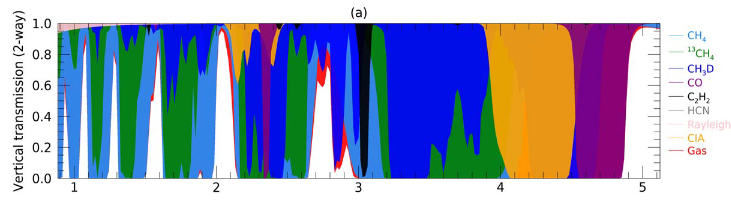

Orange indicates the presence of Collision Induced Absorption. The peaks that are modeled by [1] above are the ones near 4 and 2 microns. There is another one sitting around 2.5 microns, when the peak displayed above ranges from about 2 microns to 2.3 microns. Which means that peak at 2.5 microns is likely nitrogen-hydrogen interactions. However as there's also a lot of OTHER absorbers there, does it particuarly matter? Probably not. 

BELOW: bad previous work I'll be examining later. 

Now I find myself asking a question: what kinds of CIA might we see on Titan? The major components of the atmosphere are nitrogen and methane. Naturally we know ahead of time that nitrogen is important, but what about methane, and methane-nitrogen? Well, in general this is determined by the frequency of "collisions," which determines how intense the emission (or absorption) is. We can find the frequency of collisions from the mean free path, the average length between collisions, and we can get time from temperature which is never hard to find. 

The mean free path is a well known formula: $l = \frac{1}{\sqrt{2}\sigma n}$. This is for moving gasses... of one constituent. 

For two constituents some things change. Each component will have its own adjustment. For instance, n is now the density of the target species, so in our case N2 or CH4, depending. The cross sectional area is now going to be a combination of two radii, $\pi((r_1+r_2)/2)^2$. The factor out front, $\sqrt 2$, has to do with the SPEED. This factor comes from the relative speed relation $\sqrt{v_1^2 + v_2^2}$ when the velocities are the same. 

(as this is all mathematical stuff I'm not putting it in the main sources, but I'm getting all this from http://hyperphysics.phy-astr.gsu.edu/hbase/Kinetic/menfre.html#c2 )

From all of this we generate a more general mean free path calculator. 

$$ l = \frac{1}{\frac{\sqrt{v_1^2+v_2^2}}{v_1} \pi(\frac{r_1+r_2}{2})^2 n_2} $$

Of course we want to turn this into a collision rate, we want path lengths crossed per second by our particle. This would be v/l, or...

$$ v/l = \frac{\sqrt{v_1^2+v_2^2}}{v_1^2} \pi(\frac{r_1+r_2}{2})^2 n_2 $$

This is what we want, path lengths per second (or collisions per second). But we can't just use the velocities, no, we need to derive them from kinematics. 

$$ \frac12 mv^2 = \frac32 kT $$
$$ v = \sqrt{3 kT/m} $$

Since we are dealing in single molecules, our mass is $\mu$

$$ v/l = \frac{\sqrt{1/\mu_1^2+1/\mu_2^2}}{1/\mu_1} \pi(\frac{r_1+r_2}{2})^2 n_2 $$

The actual quantity we are interested in is collisions per volume per second, so we need to multiply by $n_1$, that is, the number of molecules of the active species we are considering. Call it CSV: Collisions per Second per Volume

$$ CSV = \frac{\sqrt{1/\mu_1^2+1/\mu_2^2}}{3kT/\mu_1^2} \pi(\frac{r_1+r_2}{2})^2 n_2n_1 $$


Now I find myself asking a question: what kinds of CIA might we see on Titan? The major components of the atmosphere are nitrogen and methane. Naturally we know ahead of time that nitrogen is important, but what about methane, and methane-nitrogen? Well, in general this is determined by the frequency of "collisions," which determines how intense the emission (or absorption) is. We can find the frequency of collisions from the mean free path, the average length between collisions, and we can get time from temperature which is never hard to find. 

The mean free path is a well known formula: $l = \frac{1}{\sigma n}$

(Okay so strictly speaking there's a factor of $\sqrt 2$ in front due to everything moving but that doesn't change too much.) 

Where l is the mean free path, n is the number of particles per unit volume, and $\sigma$ is the cross sectional area for collision. In this case it would be the size of a N2 molecule viewed dead on. (This does assume it to be spherical, which is not great, but should work on average). 

n = N/V. We want mass / volume to get density, but that does not appear to be on offer in a simple sense. But we can convert it:

$\rho = m / V = N \mu /V = n \mu$

Where $\mu$ is the molecular mass we're considering. Which means we can express mean free path as

$$ l = \frac{\mu}{\sigma \rho} $$

$\rho$ is a parameter we can control. $\mu$ is a constant based on the atomic mass of the molecule. $\sigma$ is based on the size. 

Now, getting the mean free path from density is just one part, what we really want is to figure out "how many collisions per second?" For that we need to know how fast the molecules are going, which means we use the kinetic energy relation:  

$$ \frac12 mv^2 = \frac32 kT $$

l/v gives us time in seconds for a single particle to hit something, and then we can multiply by the number of particles per unit volume (n) once more to actually solve how many collisions occur per second per unit volume. (or well cubic meter.) This means our "m" is replaced with $"\mu"$ here to represent mass of a single molecule/atom.

So the number of seconds it takes for a molecule to pass a path length is l/v. If we want "how many path lengths are crossed per seocnd" we invert it to v/l, or $\sigma n v$. If we want collisions per volume per second, we need to multiply by n again. 

So our real expression (for an ideal gas) collisions per volume is

$$ \sigma n^2 \sqrt{3kT/\mu} $$

Now we want to correlate n to the density, but we already did that before. 

$$ \sigma \frac{\rho^2}{\mu^2} \sqrt{3kT/\mu} = \sigma \frac{\rho^2}{\mu^{5/2}} \sqrt{3kT} $$

And all of this is measureable: cross sectional area, temperature, density, molecular mass... and k is just the boltzmann constant. This only works for ideal gasses, though, which nitrogen is well enough on Titan, but Methane can deviate up to 9% if our extrapolations elsewhere were correct.

Anyway, let's do a sanity check. Collision number goes up with cross section: yep. Goes up with density: yep. Goes up with temperature: yep. Goes *down* with molecular mass; this seems odd at first until you remember that the velocity would go down with an increase in mass, as it takes more energy to move it, and less velocity is fewer collisions. 

And it does *not* give us the collision frequency for, say, a mixture of gasses.

Anyway let's compare the two effects of nitrogen and methane. Nitrogen is ~95% and methane is ~5%. Which means, ironically, for our purposes the number density would be easier to analyze things with. 

$$ \propto \sigma n^2 \mu^{-1/2} $$

As k is constant and T on Titan is the same for both species. The 95% to 5% ratio of composition indicates that the n ratio is 19 to 1, or 361 to 1 for $n^2$. Whew! 

N2 has a molecular mass of 28, methane has 16, so roughtly a factor of 2 to 1 in favor of N2. If you square root the difference the molecular mass barely has an effect.

Now the only thing I can't just pull out of my hat is the cross section, especially because N2 is not a spherically symmetric molecule. But we can use the molecular diameter to get an estimate: methane has 0.68 nm, while N2 has 0.3 nm. Since this is cross sectional area, the difference between them will be squared, or 0.462 to 0.09, a factor of 5, so methane wins this one. 

So in Titan's atmosphere, collisions occur at a rate of N2:CH4 of ~70. So 70 times more collisions from N2 than methane. And even then, there's no guarantee that there will be any overlap of any sort! The collisions could influence entirely different electromangetic regimes! The question now becomes: okay so we identify the rate of collisions, which will tell us which regimes have the collision induced absorption chance. (Basically, when the collision number exceeds 1 per wavelength of the particular light we care about). But that's only if the collision induces an energy level transition that can be used: the collision may only open up a specific infrared wavelength. 



Okay so the nature of a mixture of particles is important. What does multiple constituents change, and by how much? Well, it means we have to add up the collision rates: N2 with N2, N2 with CH4, CH4 with N2, and CH4 with CH4. Then we would have to weight both sides of the colliding particle, one for N2 and one for CH4, which would basically be "pick a random particle what is the collision rate with it for particle a and what is it for particle b?"

Here are the rough proportionality factors for each case:

$$N2 \rightarrow N2 \propto ~469$$
$$CH4 \rightarrow CH4\propto ~5$$
$$N2 \rightarrow CH4 \propto ~10$$
$$CH4 \rightarrow N2 \propto ~1083$$

Now these are the rates just for an individual molecule. So we may think that the relative effect of methane on nitrogen action would be dominant, it is not, the nitrogen on nitrogen is. In fact we'd need to divide the results by the ratio of 5%/95% for that, aka a factor of 19, to get the actual relative nature:

$$N2 \rightarrow N2 \propto ~469$$
$$CH4 \rightarrow CH4\propto ~5$$
$$N2 \rightarrow CH4 \propto ~<1$$
$$CH4 \rightarrow N2 \propto ~57$$

Nitrogen-Nitrogen interactions still heavily dominate, but methane-nitrogen has a 1/9th effect, which could be singificant. IF the CIA lines for N2-N2 and CH4-N2 overlap. Which I have no clue about. 

# References 

[1] **Hartmann et al, 2017**: Collision-induced absorption by N2 near 2.16 um: Calculations, model, and consequences for atmospheric remote sensing. 

https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016JD025677

[2] **Es-Sayeh et al, 2023**: Updated Radiative Transfer Model for Titan in the Near-infrared Wavelength Range: Validation Against Huygens Atmospheric and Surface Measurements and Application to the Cassini/VIMS Observations of the Dragonfly Landing Area. 

https://insu.hal.science/insu-04036493

[3] **Abel et al, 2011**: Note: Computation of Collision-Induced Absorption by Dense Deuteriu-Helium Gas Mixtures

https://pubs.aip.org/aip/jcp/article/134/7/076101/955616/Note-Computation-of-collision-induced-absorption

[4] **Moraldi and Frommhold, 1996**: Dipole Moments Induced in Three Interacting Molecules

https://www.sciencedirect.com/science/article/pii/0167732296009646

[5] **Crawford et al, 1949**: Infra-Red Absorption of Oxygen and Nitrogen Induced by Intermollecular Forces

https://journals.aps.org/pr/pdf/10.1103/PhysRev.75.1607

[6] **Shapiro and Gush, 1966**: The Collision-Induced Fundamental and First Overtone Bands of Oxygen and Nitrogen

https://cdnsciencepub.com/doi/10.1139/p66-079

[7] **Bussery-Honvault and Hartmann, 2014**: Ab Initio Calculations for the Far Infrared Collision Induced Absorption by N2 Gas

https://pubs.aip.org/aip/jcp/article/140/5/054309/73807

[8] **Hartmann and Jacquemart, 2011**: Molecular Dynamics Simulations for CO2 Spectra. II. The Far Infrared Collision-Induced Absorption Band

https://pubs.aip.org/aip/jcp/article/134/9/094316/211788/Molecular-dynamics-simulations-for-CO2-spectra-II

[9] **Borysow and Frommhold, 1986**: Collision-Induced Rototransitional Absorption Spectra of N2-N2 Pairs for Temperatures from 50 to 300 K

https://articles.adsabs.harvard.edu/full/1986ApJ...311.1043B

[10] **Karman et al. 2015**: Quantum Mechanical Calculation of the Collision-Induced Absorption Spectra of N2-N2 with Anisotropic Interacitons

https://pubs.aip.org/aip/jcp/article/142/8/084306/353037/Quantum-mechanical-calculation-of-the-collision

